In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
fi_csv = pd.read_csv("fi_csv_new.csv")

In [3]:
fi_csv

,features,importance
0,submitted_2019,-0.284912
1,published_2020,-0.216483
2,keyword_lda_17,-0.188543
3,introduction_NoW,-0.186383
4,keyword_lda_11,-0.181980
...,...,...
90,submitted_2018,0.180969
91,published_2016,0.181204
92,published_2018,0.210759
93,length,0.267165


In [4]:
main = pd.read_csv("journal_table_csv.csv")
main

,download,citing_q2th,submitted_2011,submitted_2012,submitted_2013,submitted_2014,submitted_2015,submitted_2016,submitted_2017,submitted_2018,...,abstract_lda_15,abstract_lda_16,abstract_lda_17,abstract_lda_18,abstract_lda_19,Indo,Mix,Non-Indo,Writers,FirstIndo
0,6.920672,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
1,6.797942,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,3,0
2,6.701962,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,3,1
3,6.300788,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,3,0
4,6.669499,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1.791926,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4,1
1021,1.386544,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5,1
1022,1.946053,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4,1
1023,1.098946,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,1


In [5]:
features = main
#features.drop('citing_q2th', axis=1, inplace=True)

## Submission

In [6]:
columns_pop = features.columns.values[2:12]
unpop=main[main['citing_q2th']==0]
pop=main[main['citing_q2th']==1]
unpop_count = unpop[columns_pop].sum().values
pop_count = pop[columns_pop].sum().values

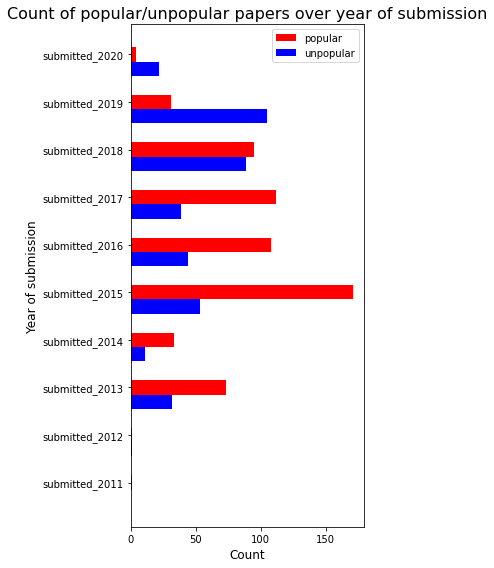

In [7]:
import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (5,8))
pl.title("Count of popular/unpopular papers over year of submission", fontsize = 16)
pl.barh(np.arange(len(columns_pop)), pop_count, height = 0.3, align="center", color = 'r', \
          label = "popular")
pl.barh(np.arange(len(columns_pop)) - 0.3, unpop_count, height = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.yticks(np.arange(len(columns_pop)), columns_pop)
pl.xlabel("Count", fontsize = 12)
pl.ylabel("Year of submission", fontsize = 12)
    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.pdf")
pl.show()

## Published Year

In [8]:
columns_published = features.columns.values[12:19]
unpop=main[main['citing_q2th']==0]
pop=main[main['citing_q2th']==1]
unpop_count = unpop[columns_published].sum().values
pop_count = pop[columns_published].sum().values

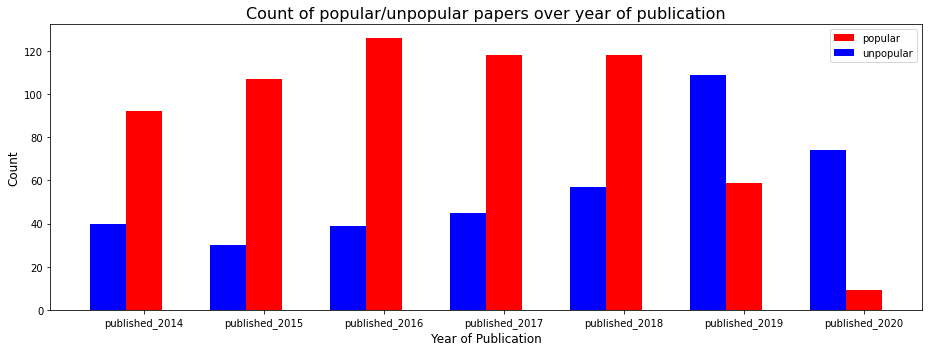

In [9]:
import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular papers over year of publication", fontsize = 16)
pl.bar(np.arange(len(columns_published)), pop_count, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_published)) - 0.3, unpop_count, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_published)), columns_published)
pl.ylabel("Count", fontsize = 12)
pl.xlabel("Year of Publication", fontsize = 12)
    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.pdf")
pl.show()

## Title LDA

In [10]:
columns_title_lda = features.columns.values[31:51]
unpop=main[main['citing_q2th']==0]
pop=main[main['citing_q2th']==1]
unpop_count = unpop[columns_title_lda].sum().values
pop_count = pop[columns_title_lda].sum().values

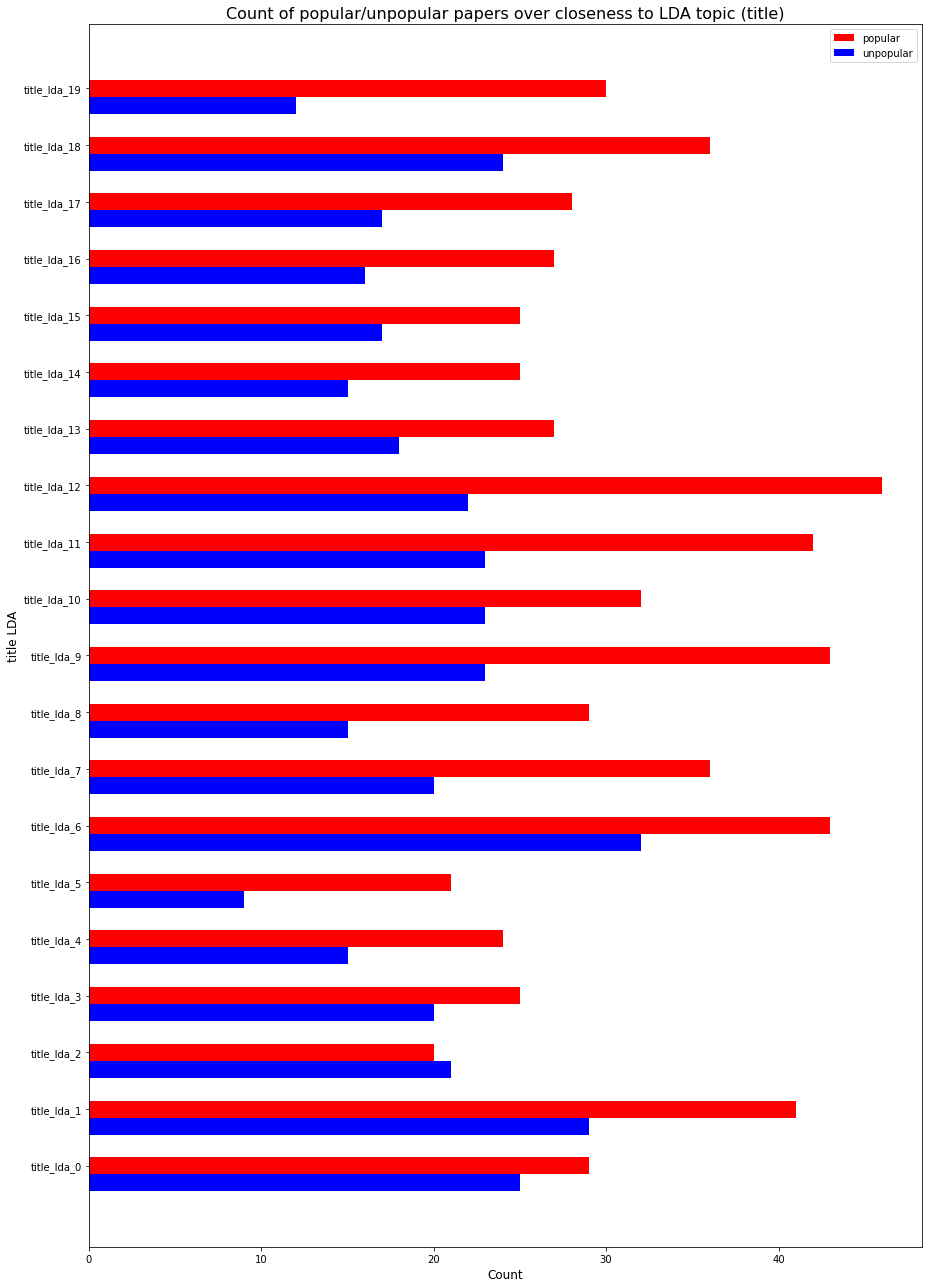

In [11]:
import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,18))
pl.title("Count of popular/unpopular papers over closeness to LDA topic (title)", fontsize = 16)
pl.barh(np.arange(len(columns_title_lda)), pop_count, height = 0.3, align="center", color = 'r', \
          label = "popular")
pl.barh(np.arange(len(columns_title_lda)) - 0.3, unpop_count, height = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.yticks(np.arange(len(columns_title_lda)), columns_title_lda)
pl.xlabel("Count", fontsize = 12)
pl.ylabel("title LDA", fontsize = 12)
    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.pdf")
pl.show()

## Keyword LDA

In [13]:
columns_keyword_lda = features.columns.values[51:71]
unpop=main[main['citing_q2th']==0]
pop=main[main['citing_q2th']==1]
unpop_count = unpop[columns_keyword_lda].sum().values
pop_count = pop[columns_keyword_lda].sum().values

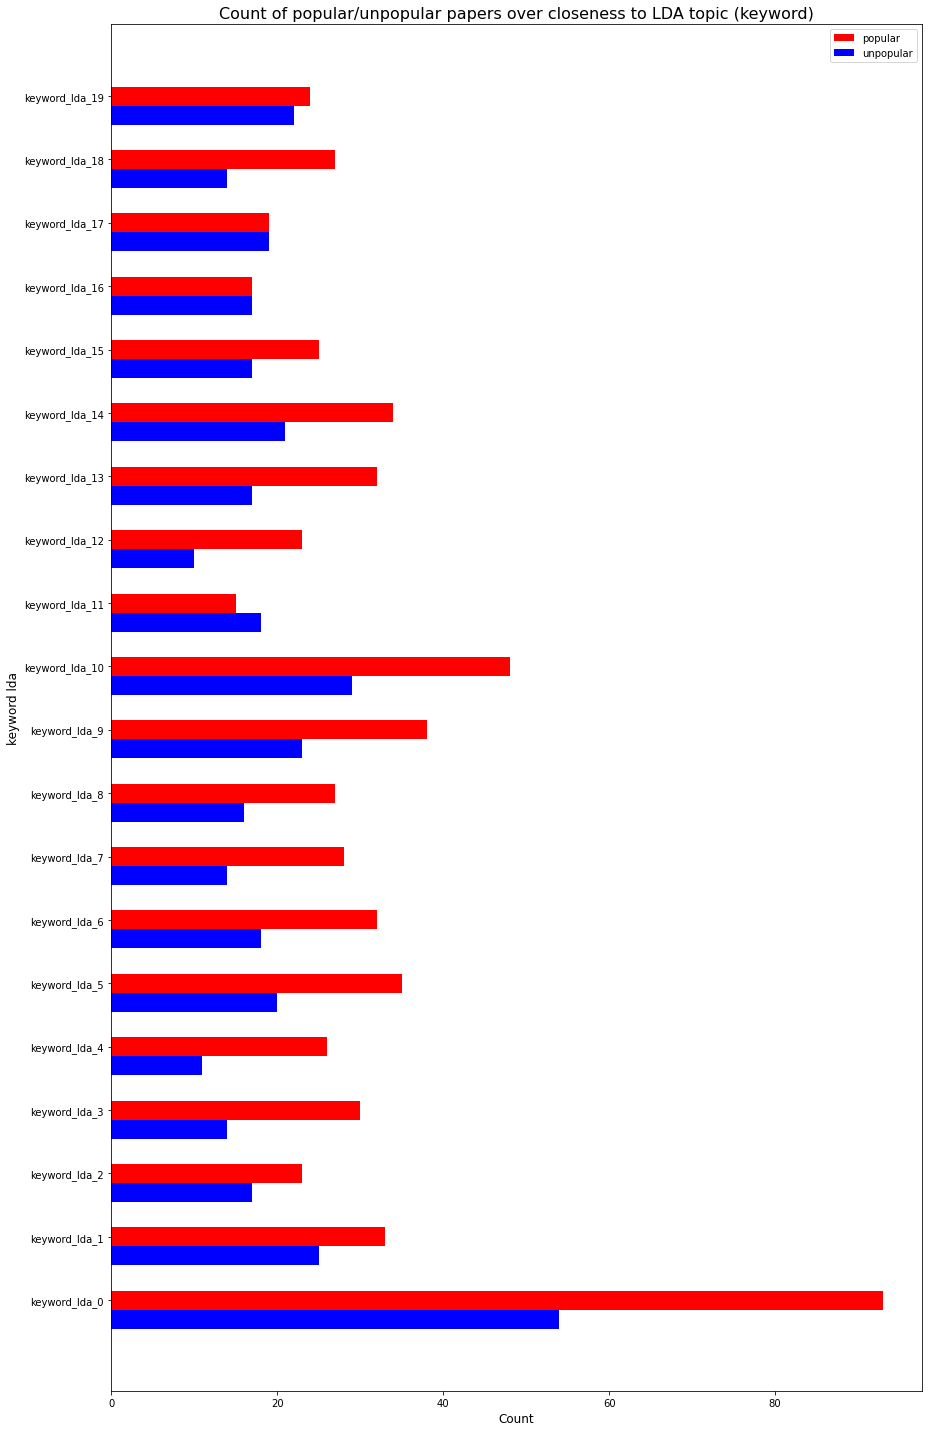

In [14]:
import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,20))
pl.title("Count of popular/unpopular papers over closeness to LDA topic (keyword)", fontsize = 16)
pl.barh(np.arange(len(columns_keyword_lda)), pop_count, height = 0.3, align="center", color = 'r', \
          label = "popular")
pl.barh(np.arange(len(columns_keyword_lda)) - 0.3, unpop_count, height = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.yticks(np.arange(len(columns_keyword_lda)), columns_keyword_lda)
pl.xlabel("Count", fontsize = 12)
pl.ylabel("keyword lda", fontsize = 12)
    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.pdf")
pl.show()

## Abstract LDA

In [15]:
columns_abstract_lda = features.columns.values[71:91]
unpop=main[main['citing_q2th']==0]
pop=main[main['citing_q2th']==1]
unpop_count = unpop[columns_abstract_lda].sum().values
pop_count = pop[columns_abstract_lda].sum().values

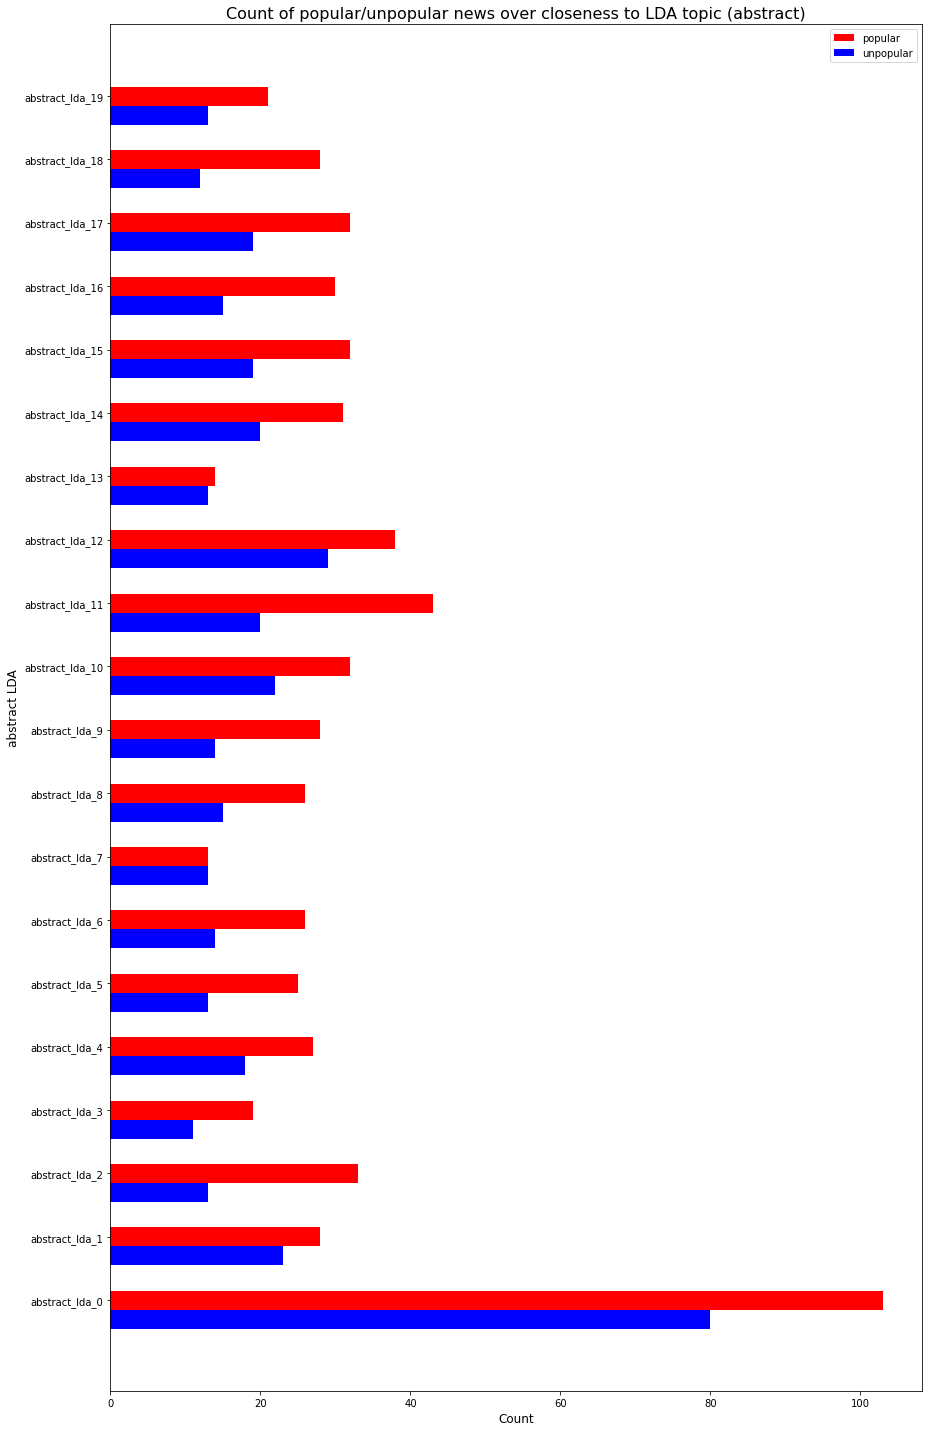

In [16]:
import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,20))
pl.title("Count of popular/unpopular news over closeness to LDA topic (abstract)", fontsize = 16)
pl.barh(np.arange(len(columns_abstract_lda)), pop_count, height = 0.3, align="center", color = 'r', \
          label = "popular")
pl.barh(np.arange(len(columns_abstract_lda)) - 0.3, unpop_count, height = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.yticks(np.arange(len(columns_abstract_lda)), columns_abstract_lda)
pl.xlabel("Count", fontsize = 12)
pl.ylabel("abstract LDA", fontsize = 12)
    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.pdf")
pl.show()

## Nationality

In [17]:
columns_nationality = features.columns.values[np.r_[91:94, 95]]
unpop=main[main['citing_q2th']==0]
pop=main[main['citing_q2th']==1]
unpop_count = unpop[columns_nationality].sum().values
pop_count = pop[columns_nationality].sum().values

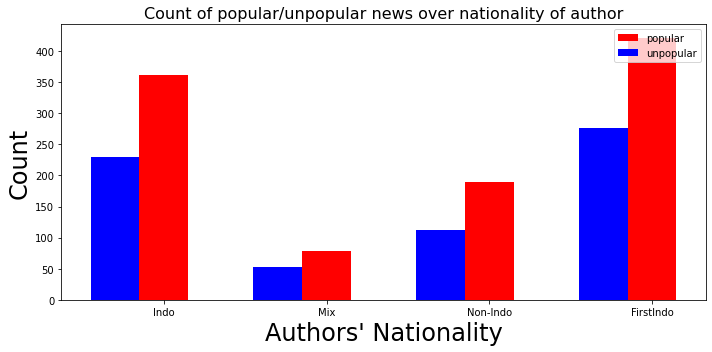

In [18]:
import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (10,5))
pl.title("Count of popular/unpopular news over nationality of author", fontsize = 16)
pl.bar(np.arange(len(columns_nationality)), pop_count, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_nationality)) - 0.3, unpop_count, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_nationality)), columns_nationality)
pl.ylabel("Count", fontsize = 24)
pl.xlabel("Authors' Nationality", fontsize = 24)
    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.pdf")
pl.show()

## Length Data

<AxesSubplot:xlabel='citing_q2th', ylabel='length'>

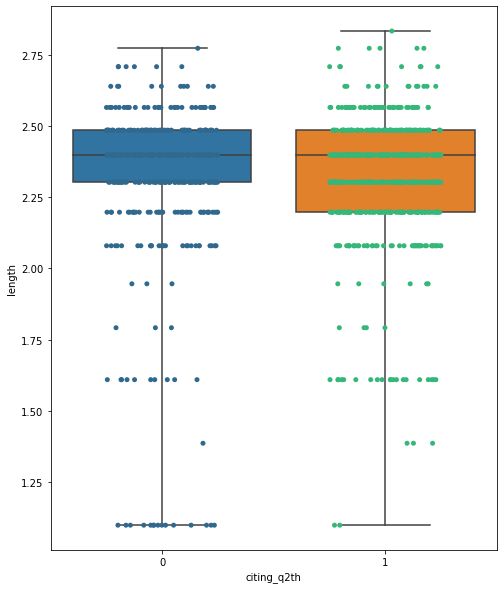

In [19]:
plt.figure(figsize=(8,10))
sns.stripplot(x='citing_q2th', y='length', data=main, jitter=0.25, dodge=False, palette='viridis')
sns.boxplot(x='citing_q2th', y='length', data=main, whis=np.inf)

## Weight and LDA Comparison

In [20]:
abstract_csv = pd.read_csv("abstract_lda.csv")

In [21]:
abstract = pd.concat([main['citing_q2th'], abstract_csv], axis=1)

In [22]:
abstract.set_index('citing_q2th',inplace=True)

In [23]:
abstract_lda = abstract[abstract==1].stack().reset_index().drop(0,1)

In [24]:
abstract_lda.columns

Index(['citing_q2th', 'level_1'], dtype='object')

In [25]:
abstract_lda.rename(columns = {'level_1':'abstract_lda'}, inplace = True)

In [26]:
abstract_lda['lda'] = abstract_lda['abstract_lda'].str[-1:]

In [27]:
abstract_lda['lda'] = abstract_lda['lda'].astype(int)

In [28]:
abstract_lda_weight = pd.concat([abstract_lda, main['abstract_lda_weight']], axis=1)

In [29]:
abstract_lda_weight

,citing_q2th,abstract_lda,lda,abstract_lda_weight
0,1,abstract_lda_0,0,0.050000
1,1,abstract_lda_8,8,0.306063
2,1,abstract_lda_18,8,0.350237
3,1,abstract_lda_8,8,0.536036
4,0,abstract_lda_1,1,0.524999
...,...,...,...,...
1020,0,abstract_lda_6,6,0.333981
1021,0,abstract_lda_2,2,0.525000
1022,0,abstract_lda_0,0,0.050000
1023,0,abstract_lda_13,3,0.525000


<AxesSubplot:xlabel='citing_q2th', ylabel='abstract_lda_weight'>

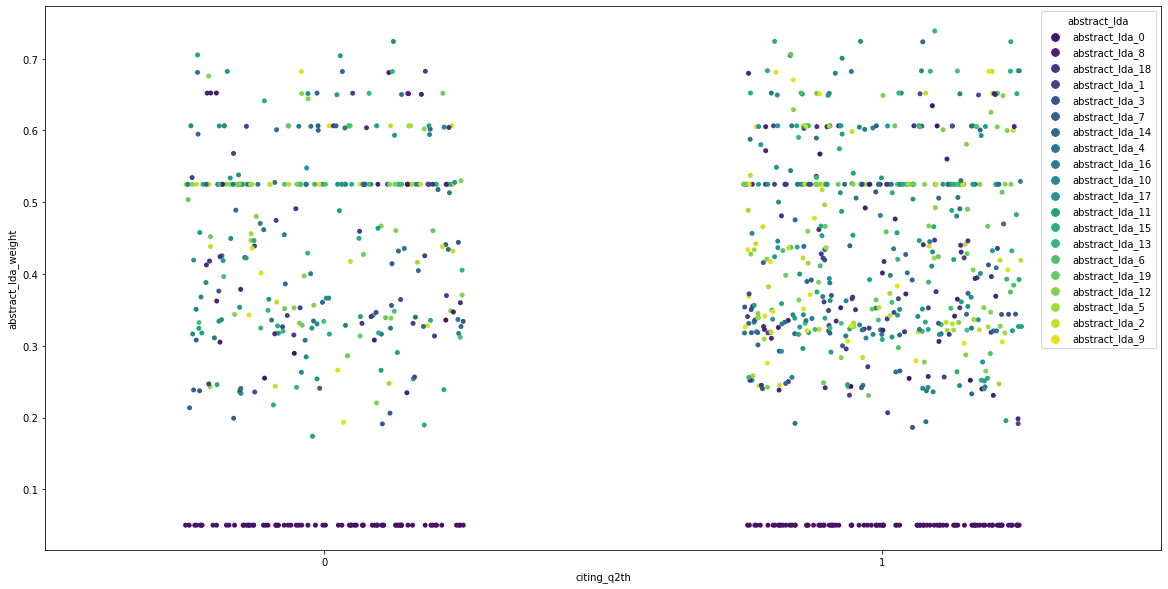

In [31]:
plt.figure(figsize=(20,10))
sns.stripplot(x='citing_q2th', y='abstract_lda_weight', data=abstract_lda_weight, hue='abstract_lda', jitter=0.25, dodge=False, palette='viridis')

### LDA 7

In [32]:
abstract_lda_7_19 = abstract_lda_weight[abstract_lda_weight["abstract_lda"].isin(['abstract_lda_6','abstract_lda_18'])]
#abstract_lda_7_ = abstract_lda_weight[abstract_lda_weight['lda'] == 6]
# titanic[titanic["Pclass"].isin([2, 3])]

In [33]:
abstract_lda_7_19

,citing_q2th,abstract_lda,lda,abstract_lda_weight
2,1,abstract_lda_18,8,0.350237
5,1,abstract_lda_18,8,0.524999
32,1,abstract_lda_6,6,0.331231
34,1,abstract_lda_6,6,0.606490
52,1,abstract_lda_6,6,0.360443
...,...,...,...,...
959,1,abstract_lda_6,6,0.652202
992,1,abstract_lda_6,6,0.605237
1014,0,abstract_lda_6,6,0.524999
1016,0,abstract_lda_6,6,0.606497


<AxesSubplot:xlabel='citing_q2th', ylabel='abstract_lda_weight'>

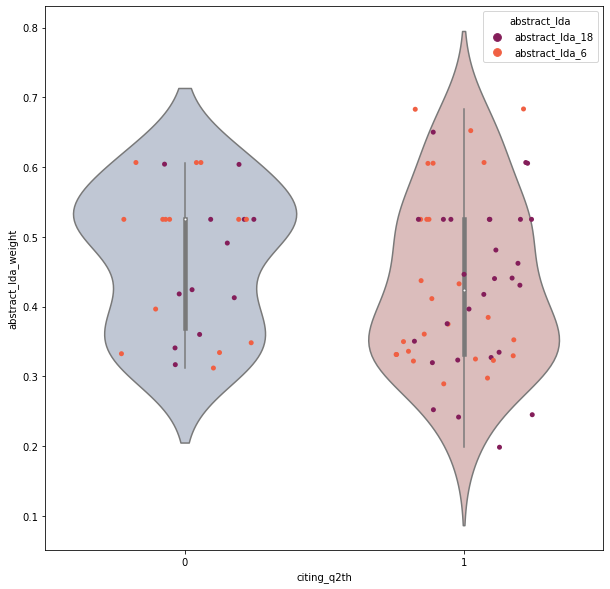

In [46]:
plt.figure(figsize=(10,10))
sns.stripplot(x='citing_q2th', y='abstract_lda_weight', data=abstract_lda_7_19, hue='abstract_lda', jitter=0.25, dodge=False, palette = 'rocket')
sns.violinplot(x='citing_q2th', y='abstract_lda_weight', data=abstract_lda_7_19, whis=np.inf, palette = 'vlag')


In [140]:
abstract_lda_7 = abstract_lda_weight[abstract_lda_weight['abstract_lda'] == 'abstract_lda_6']

In [142]:
abstract_lda_7[abstract_lda_7.abstract_lda_weight == abstract_lda_7.abstract_lda_weight.max()]

,citing_q2th,abstract_lda,lda,abstract_lda_weight
65,1,abstract_lda_6,6,0.68328


In [48]:
journal_table = pd.read_csv('journal_table_raw.csv')

In [51]:
pd.set_option('display.max_colwidth', None)

In [52]:
journal_table.abstract[65:66]

65    <p align="justify"><!--[if gte mso 9]><xml>\r\n <o:OfficeDocumentSettings>\r\n  <o:TargetScreenSize>1024x768</o:TargetScreenSize>\r\n </o:OfficeDocumentSettings>\r\n</xml><![endif]--><!--[if gte mso 9]><xml>\r\n <w:WordDocument>\r\n  <w:View>Normal</w:View>\r\n  <w:Zoom>0</w:Zoom>\r\n  <w:TrackMoves></w:TrackMoves>\r\n  <w:TrackFormatting></w:TrackFormatting>\r\n  <w:PunctuationKerning></w:PunctuationKerning>\r\n  <w:ValidateAgainstSchemas></w:ValidateAgainstSchemas>\r\n  <w:SaveIfXMLInvalid>false</w:SaveIfXMLInvalid>\r\n  <w:IgnoreMixedContent>false</w:IgnoreMixedContent>\r\n  <w:AlwaysShowPlaceholderText>false</w:AlwaysShowPlaceholderText>\r\n  <w:DoNotPromoteQF></w:DoNotPromoteQF>\r\n  <w:LidThemeOther>EN-US</w:LidThemeOther>\r\n  <w:LidThemeAsian>X-NONE</w:LidThemeAsian>\r\n  <w:LidThemeComplexScript>X-NONE</w:LidThemeComplexScript>\r\n  <w:Compatibility>\r\n   <w:BreakWrappedTables></w:BreakWrappedTables>\r\n   <w:SnapToGridInCell></w:SnapToGridInCell>\r\n   <w:WrapTextWithP

In [82]:
journal_table['abstract'] = journal_table['abstract'].astype('|S')
journal_table['title'] = journal_table['title'].astype('|S')
journal_table['keywords'] = journal_table['keywords'].astype('|S')

UnicodeEncodeError: 'ascii' codec can't encode character '\xb0' in position 154: ordinal not in range(128)

In [76]:
import re as re

In [77]:
def html_to_str(string):
    result = re.sub('<.*?>','',string)
    return result

In [78]:
conv = lambda i : i or ' ' 

In [79]:
journal_table['abstract'] = [conv(i) for i in journal_table['abstract']] 
journal_table['introduction'] = [conv(i) for i in journal_table['introduction']] 
journal_table['experimental_method'] = [conv(i) for i in journal_table['experimental_method']] 
journal_table['conclusion'] = [conv(i) for i in journal_table['conclusion']] 
journal_table['acknowledgement'] = [conv(i) for i in journal_table['acknowledgement']] 
journal_table['references'] = [conv(i) for i in journal_table['references']] 
journal_table['result'] = [conv(i) for i in journal_table['result']] 

In [80]:
journal_table['abstract_str']=journal_table['abstract'].apply(lambda cw : html_to_str(cw))
journal_table['introduction_str']=journal_table['introduction'].apply(lambda cw : html_to_str(cw))

TypeError: expected string or bytes-like object

In [81]:
journal_table.dtypes

journal_id              int64
sub_id                  int64
issue_id                int64
title                  object
keywords               object
abstract               object
introduction           object
experimental_method    object
result                 object
conclusion             object
acknowledgement        object
references             object
pdf_file               object
pages                  object
download                int64
doi_url                object
cite                   object
date_submit            object
date_revise            object
date_accept            object
date_publish           object
erratum_file           object
erratum_type           object
erratum_date           object
abstract_str           object
dtype: object